In [1]:
# %env PYTORCH_ENABLE_MPS_FALLBACK=1
%load_ext autoreload
%autoreload

from bins import Bins
from utils import calcOneChi2, HistMaker_1d, diffHist, setOPT_text, setTH1, setPad
from ROOT import TFile, TH1, TH3F, TF2, TF1, TCanvas, TStyle, gStyle, Form, Fit, TLegend
import scipy.optimize as opt
import math
import calendar, os
from time import time, gmtime

Welcome to JupyROOT 6.28/04


In [2]:
gStyle.SetOptStat(0)

read_saved = True
range_used = range(0,12)

if read_saved:
    DIR_NAME = "results_sameevt_nu15_noise1em1_1d"
else:
    current_GMT =   gmtime()
    time_stamp = calendar.timegm(current_GMT)
    DIR_NAME = f'results_{time_stamp}'
    os.mkdir(DIR_NAME)

In [3]:
bins = Bins.readFrom("ranges.yml")
#histMakerData_np = HistMaker_1d("apr12_diele_088_090_ag123ag_2500A_accepted_np_mix_hc_sample_2.dat", "_data", bins)
histMakerData_np = HistMaker_1d("apr12_diele_088_090_ag123ag_2500A_accepted_np_2.dat", "_data_np", bins)
histsData_np = histMakerData_np.makeHists()
histMakerData_pp = HistMaker_1d("apr12_diele_088_090_ag123ag_2500A_accepted_pp_2.dat", "_data_pp", bins)
histsData_pp = histMakerData_pp.makeHists()
histMakerData_nn = HistMaker_1d("apr12_diele_088_090_ag123ag_2500A_accepted_nn_2.dat", "_data_nn", bins)
histsData_nn = histMakerData_nn.makeHists()
histMakerMC_rho = HistMaker_1d("mar19_diele_inmedium_heli0cm_np.dat", "_MC_rho", bins)
histMakerMC_pi0 = HistMaker_1d("mar19_diele_pi0_heli0cm_np.dat", "_MC_pi0", bins)
def getHistMakerMC(HIST_INDEX):
    return histMakerMC_pi0 if HIST_INDEX < 3 else histMakerMC_rho
   # return histMakerMC_rho


iter 0
#1 [[<cppyy.gbl.TH1F object at 0x298284480>, <cppyy.gbl.TH1F object at 0x2982851e0>, <cppyy.gbl.TH1F object at 0x2982855d0>, <cppyy.gbl.TH1F object at 0x2982859c0>, <cppyy.gbl.TH1F object at 0x298285db0>, <cppyy.gbl.TH1F object at 0x2982861a0>, <cppyy.gbl.TH1F object at 0x298286590>, <cppyy.gbl.TH1F object at 0x298286980>, <cppyy.gbl.TH1F object at 0x298286d70>, <cppyy.gbl.TH1F object at 0x298287160>, <cppyy.gbl.TH1F object at 0x298287550>, <cppyy.gbl.TH1F object at 0x298287940>], [<cppyy.gbl.TH1F object at 0x298287d30>, <cppyy.gbl.TH1F object at 0x298288510>], [<cppyy.gbl.TH1F object at 0x298288120>, <cppyy.gbl.TH1F object at 0x298288900>]]
#2 [[<cppyy.gbl.TH1F object at 0x17ab8c9c0>, <cppyy.gbl.TH1F object at 0x17ab8cdb0>, <cppyy.gbl.TH1F object at 0x17ab8d1a0>, <cppyy.gbl.TH1F object at 0x17ab8d590>, <cppyy.gbl.TH1F object at 0x17ab8d980>, <cppyy.gbl.TH1F object at 0x17ab8dd70>, <cppyy.gbl.TH1F object at 0x17ab8e160>, <cppyy.gbl.TH1F object at 0x17ab8e550>, <cppyy.gbl.TH1F ob

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/base_hists_pi0_MC.gif has been created


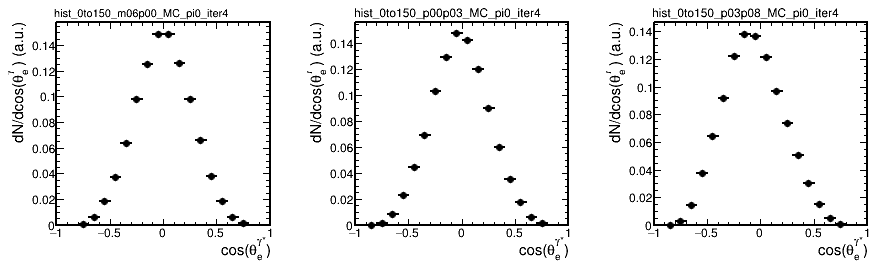

In [4]:
base_hists_pi0 = histMakerMC_pi0.builder.base_hists
can3 = TCanvas("can3","can3",900,300)
can3.Divide(3,1)
can3.Draw()
for i, hist in enumerate(base_hists_pi0[0]):
    if i < 3:
        pad = can3.cd(i+1)
        setPad(pad)

        if not isinstance(hist, list):
            hist.GetXaxis().SetTitle("cos(#theta_{e}^{#gamma*})")
            setTH1(hist, hist.GetXaxis().GetTitle(), f"dN/d{hist.GetXaxis().GetTitle()} (a.u.)", 
               505, 20, 0.8, 1)
            hist.Draw()
        else:
            print(hist)
can3.SaveAs(f"{DIR_NAME}/base_hists_pi0_MC.gif")

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/base_hists_rho_MC.gif has been created


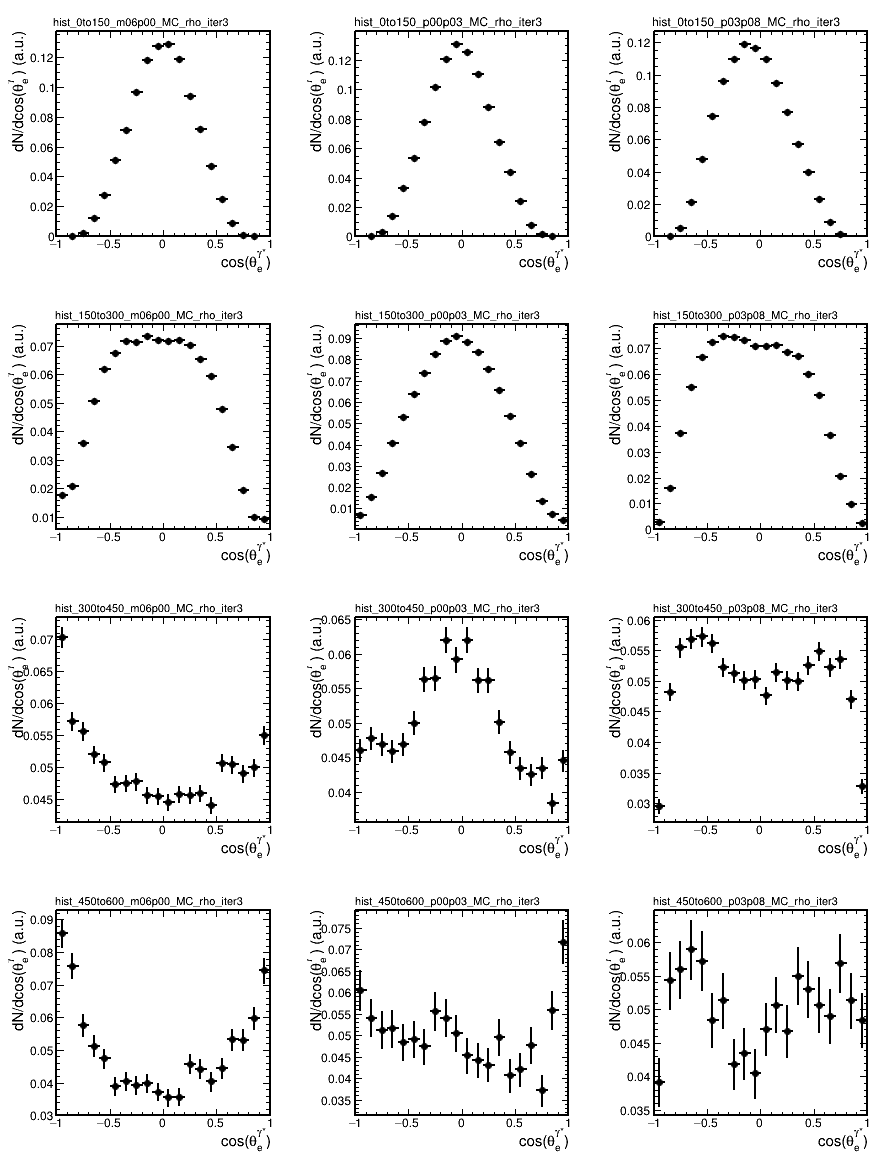

In [5]:
base_hists_rho = histMakerMC_rho.builder.base_hists
can5 = TCanvas("can5","can5",900,1200)
can5.Divide(3,4)
can5.Draw()
for i, hist in enumerate(base_hists_rho[0]):
    pad = can5.cd(i+1)
    setPad(pad)
    if not isinstance(hist, list):
        hist.GetXaxis().SetTitle("cos(#theta_{e}^{#gamma*})")
        setTH1(hist, hist.GetXaxis().GetTitle(), f"dN/d{hist.GetXaxis().GetTitle()} (a.u.)", 
               505, 20, 0.8, 1)
        hist.Draw()
    else:
        print(hist)
can5.SaveAs(f'{DIR_NAME}/base_hists_rho_MC.gif')


Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/histsData_np.gif has been created


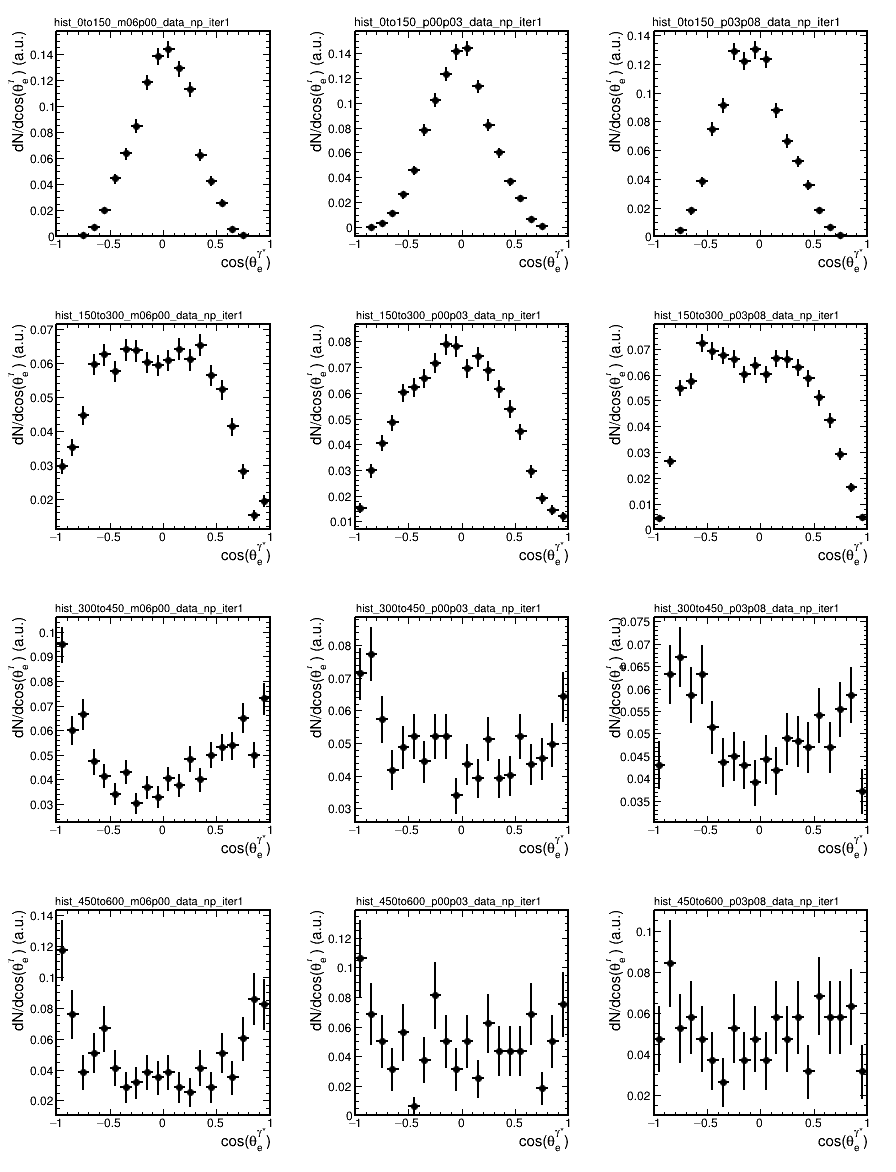

In [6]:
can4 = TCanvas("can4","can4",900,1200)
can4.Divide(3,4)
can4.Draw()
for i, hist in enumerate(histsData_np[0]):
    pad = can4.cd(i+1)
    setPad(pad)
    if not isinstance(hist, list):
        hist.GetXaxis().SetTitle("cos(#theta_{e}^{#gamma*})")
        setTH1(hist, hist.GetXaxis().GetTitle(), f"dN/d{hist.GetXaxis().GetTitle()} (a.u.)", 
               505, 20, 0.8, 1)
        hist.Draw()
    else:
        print(hist)

can4.SaveAs(f'{DIR_NAME}/histsData_np.gif')

In [7]:
import torch

torch.device("mps")
torch.manual_seed(0)

import gpytorch
import botorch

import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (8, 6)

from tqdm.notebook import tqdm

import warnings

In [8]:
TH1.SetDefaultSumw2

gpytorch.settings.fast_pred_var()
gpytorch.settings.fast_pred_samples()

N_PARAMS = 1

In [9]:
torch.backends.mps.is_available()
#mps_device = torch.device("mps")
mps_device = torch.device("cpu")
bounds = torch.tensor([[-1, ],
                       [ 1, ]], dtype=torch.float)
bounds = bounds.to(mps_device)


xs = torch.linspace(bounds[0][0], bounds[1][0], 101)

In [10]:
class GPModel(gpytorch.models.ExactGP, botorch.models.gpytorch.GPyTorchModel):
# class GPModel(gpytorch.models.ApproximateGP, botorch.models.gpytorch.GPyTorchModel):
    _num_outputs = 1

    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.MaternKernel(nu=1.5, ard_num_dims=1)
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        mean_x = mean_x.to(mps_device)
        covar_x = covar_x.to(mps_device)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

def fit_gp_model(train_x, train_y, num_train_iters=500):
    train_x = train_x.to(mps_device)
    train_y = train_y.to(mps_device)

    # declare the GP
    noise = 1e-1

    likelihood = gpytorch.likelihoods.StudentTLikelihood()
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = GPModel(train_x, train_y, likelihood)
    model.likelihood.noise = noise
    likelihood = likelihood.to(mps_device)
    model = model.to(mps_device)

    # train the hyperparameter (the constant)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    model.train()
    likelihood.train()

    for i in range(num_train_iters):
        optimizer.zero_grad()

        output = model(train_x)
        loss = -mll(output, train_y)

        loss.backward()
        
        optimizer.step()

    model.eval()
    likelihood.eval()

    return model.cpu(), likelihood.cpu()

In [11]:
# TODO: Come back to standard version
#num_queries = 75
num_queries = 200
num_repeats = 1
num_samples = 20

In [12]:
# -2 is the default value when no feasible has been found
default_value = -1

def fit_bo(HIST_INDEX = 0):
    global bounds

    def objective(xx):
        def generator(xx):
            for x in xx:
                lambda_theta = x

                histsMC = getHistMakerMC(HIST_INDEX).makeHists(lambda_theta)
                chi2, ndf = calcOneChi2(histsMC[0][HIST_INDEX], histsData_np[0][HIST_INDEX])
                allHistsMC.append(histsMC[0][HIST_INDEX])
                if not chi2 or not ndf:
                    return torch.tensor([0])
                yield torch.tensor([1.0/(chi2 / ndf)])
        return torch.stack([a for a in generator(xx)])

    def one_starting_sample():
        result = bounds[0] + (bounds[1] - bounds[0]) * torch.rand(N_PARAMS)
        return result

    feasible_incumbents = torch.ones((num_repeats, num_queries)) * default_value

    best_fs = []

    print(f"HIST INDEX: {HIST_INDEX}")
    for trial in range(num_repeats):
       # print("trial", trial)

        torch.manual_seed(trial)
       # train_x = bounds[0] + (bounds[1] - bounds[0]) * torch.rand(num_samples, 3)
       # while -2.0*train_x[0][0] - 1.0*train_x[0][2] < -2:
       #     train_x = bounds[0] + (bounds[1] - bounds[0]) * torch.rand(num_samples, 3)
        train_x = torch.stack([one_starting_sample() for _ in range(num_samples)])
        train_utility = objective(train_x).to(mps_device)
        train_x = train_x.to(mps_device)

        for i in tqdm(range(num_queries)):
            feasible_incumbents[trial, i] = train_utility.max()
            before_fit_gp = time()
            utility_model, utility_likelihood = fit_gp_model(
                train_x, train_utility.squeeze(-1)
            )
            after_fit_gp = time()
           # print("Fitting GP took " + str(after_fit_gp - before_fit_gp) + " seconds")
            best_f = train_utility.max()
            best_fs.append(best_f.item())
                
           # policy = botorch.acquisition.monte_carlo.qExpectedImprovement(
           # policy = botorch.acquisition.analytic.LogExpectedImprovement(
            policy = botorch.acquisition.logei.qLogExpectedImprovement(
          # policy = botorch.acquisition.analytic.LogProbabilityOfImprovement(
          # policy = botorch.acquisition.analytic.PosteriorMean(
                model=utility_model,
                best_f=train_utility.max(),
            ).to(mps_device)

            before_optimize_acqf = time()
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore', category=RuntimeWarning)
                next_x, acq_val = botorch.optim.optimize_acqf(
                    policy,
                    bounds=bounds,
                    #q=5,
                    #num_restarts=5,
                    #raw_samples=400,
                    q=1,
                    num_restarts=40,
                    raw_samples=100,
                )
            after_optimize_acqf = time()
           # print("Optimizing ACQF took " + str(after_optimize_acqf - before_optimize_acqf) + " seconds")

            next_utility = objective(next_x).to(mps_device)

            train_x = torch.cat([train_x, next_x])
            train_utility = torch.cat([train_utility, next_utility])
    torch.save(feasible_incumbents, f"{DIR_NAME}/incumbents_" + str(HIST_INDEX) + ".pth")
    fout = TFile(f"{DIR_NAME}/out_{HIST_INDEX}.root","RECREATE")
    fout.cd()
    for hist in allHistsMC:
       # print ("Writing hist: ", hist.GetName())
        hist.Write()
    for j, hists in enumerate(histsData_np):
        for k, hist in enumerate(hists):
                hist.Write()
               # print ("Writing hist: ", j, k, hist)
    fout.Close()

    with torch.no_grad():
        predictive_distribution = utility_likelihood(utility_model(xs))
        acquisition_score = policy(xs.unsqueeze(1))

    lambda_thetas     = train_x.flatten()
    
    c = torch.stack((
        torch.arange(0,num_queries, dtype=int),
        lambda_thetas[0:num_queries],
        train_utility.squeeze()[0:num_queries],
        (feasible_incumbents==feasible_incumbents.max())[0],
        feasible_incumbents[0]
    ),0).transpose(-2,-1)
    torch.set_printoptions(precision=4,threshold=10_000, linewidth=120)
    sort_index = c[:, N_PARAMS + 1].sort()[1]
    c_sorted = c[sort_index]
    train_x_sorted = train_x[sort_index]

    return c_sorted, train_x_sorted, predictive_distribution

In [13]:
c_sorted_all = []
train_x_sorted_all = []
predictive_mean_all = []
predictive_lower_all = []
predictive_upper_all = []

for HIST_INDEX in range_used:
    allHistsMC = []
    if read_saved:
        c_sorted = torch.load(f"{DIR_NAME}/c_sorted_" + str(HIST_INDEX) + ".pth")
        train_x_sorted = torch.load(f"{DIR_NAME}/train_x_sorted_" + str(HIST_INDEX) + ".pth")
        predictive_distribution = torch.load(f"{DIR_NAME}/predictive_distribution_" + str(HIST_INDEX) + ".pth")

        file = TFile(f"{DIR_NAME}/out_{HIST_INDEX}.root", "read")
        names = [key.GetName() for key in file.GetListOfKeys()]
        names = [name for name in names if "MC" in name]
        for name in names:
            allHistsMC.append(file.Get(name))
    else:
        c_sorted, train_x_sorted, predictive_distribution = fit_bo(HIST_INDEX)
        print(c_sorted[-5:])
        
        torch.save(c_sorted, f"{DIR_NAME}/c_sorted_" + str(HIST_INDEX) + ".pth")
        torch.save(train_x_sorted, f"{DIR_NAME}/train_x_sorted_" + str(HIST_INDEX) + ".pth")
        torch.save(predictive_distribution, f"{DIR_NAME}/predictive_distribution_" + str(HIST_INDEX) + ".pth")

    predictive_mean = predictive_distribution.mean
    predictive_lower, predictive_upper = predictive_distribution.confidence_region()
    print("AFTER_READING: ", predictive_mean[100], predictive_lower[100], predictive_upper[100])

    c_sorted_all.append(c_sorted)
    train_x_sorted_all.append(train_x_sorted)
    predictive_mean_all.append(predictive_mean)
    predictive_lower_all.append(predictive_lower)
    predictive_upper_all.append(predictive_upper)



AFTER_READING:  tensor(0.5474) tensor(0.4794) tensor(0.6154)
AFTER_READING:  tensor(1.1300) tensor(1.0499) tensor(1.2101)
AFTER_READING:  tensor(0.9332) tensor(0.8643) tensor(1.0021)
AFTER_READING:  tensor(0.5425) tensor(0.4846) tensor(0.6003)
AFTER_READING:  tensor(0.5025) tensor(0.4446) tensor(0.5603)
AFTER_READING:  tensor(0.6322) tensor(0.5743) tensor(0.6901)
AFTER_READING:  tensor(0.5026) tensor(0.4256) tensor(0.5795)
AFTER_READING:  tensor(1.1193) tensor(1.0614) tensor(1.1773)
AFTER_READING:  tensor(1.1464) tensor(1.0642) tensor(1.2287)
AFTER_READING:  tensor(1.0135) tensor(0.9347) tensor(1.0923)
AFTER_READING:  tensor(0.3630) tensor(0.3055) tensor(0.4205)
AFTER_READING:  tensor(1.0279) tensor(0.8601) tensor(1.1956)


In [14]:
from ipywidgets import interact, Layout, IntSlider, FloatSlider
import numpy as np

axis_title = r"$cos(\theta_e^{\gamma*})$"

def oneplot(ax, tensor, title):
        
        global xs
        
       # pos = ax.plot(xs, tensor, ymin=0, ymax=tensor.max())
        pos = ax.plot(xs, tensor)
       # ax.set_aspect((extent[1]-extent[0])/(extent[3]-extent[2]))
        ax.set_title(title)
        ax.set_xlabel(axis_title)

can_cmp_ind = 0

def plotComparison(can, pad_nr1, pad_nr2, histMC, histData, hist_index, pull_title):
   # print(f"PLOTTING: {histMC.GetName()} and {histData.GetName()}")
    global can_cmp_ind

    curr_bin = bins[hist_index]
    title = f"{curr_bin.m_min} < #it{{M}}_{{ee}} < {curr_bin.m_max}, {curr_bin.z_min} < cos(#theta^{{CM}}_{{#gamma*}}) < {curr_bin.z_max}"
    
    pad = can.cd(pad_nr1)
    setPad(pad)
    pad.SetRightMargin(0.16)
    histData.GetXaxis().SetTitle("cos(#theta_{e}^{#gamma*})")
    histData.SetTitle(title)
    setTH1(histData, histData.GetXaxis().GetTitle(), f"dN/d{histData.GetXaxis().GetTitle()} (a.u.)", 
               505, 20, 0.8, 1)
    histData.Draw()
    histMC.SetLineColor(2)
    histMC.Draw("SAMEHIST")
    pad = can.cd(pad_nr2)
    setPad(pad)
    pad.SetRightMargin(0.16)
    hdiff = diffHist(histMC, histData)
    hdiff.SetTitle(pull_title)
    setTH1(hdiff, hdiff.GetXaxis().GetTitle(), "Pull value", 505, 20, 0.8, 2)
    hdiff.Draw("HIST")
    can.Update()
    can.Modified()
    can.Update()
    
    return hdiff

In [15]:
def bin_index(x, min, max):
        return int((x-min)/(max-min)*101)

def covariance_fit_scipy(predictive_mean, predictive_lower, predictive_upper, best, HIST_INDEX, ax):
    def gaus1d(x, A, mean_x, sigma_x):
        x = x - mean_x
        z = A * np.exp( -0.5 * (x/sigma_x) ** 2 )
        return z
    def gaus1d_offset(x, A, mean_x, sigma_x, offset):
        x = x - mean_x
        z = offset + A * np.exp( -0.5 * (x/sigma_x) ** 2 )
        return z

    def fit_1d(ax):
        curr_bin = bins[HIST_INDEX]
        title = f"{curr_bin.m_min} < $M_{{ee}}$ < {curr_bin.m_max}, {curr_bin.z_min} < $cos(\\theta^{{CM}}_{{\gamma*}})$ < {curr_bin.z_max}"
        
        mean_x = best[0].item()

        scale1 = bounds[1][0].item()
        scale2 = bounds[1][0].item()
        proj_min_X = bounds[0][0].item()
        proj_max_X = bounds[1][0].item()

        proj = predictive_mean
        proj_lower = predictive_lower
        proj_upper = predictive_upper

       # xmin_ind = max(0,   bin_index(mean_x, proj_min_X, proj_max_X)-50)
       # xmax_ind = min(100, bin_index(mean_x, proj_min_X, proj_max_X)+50)
        xmin_ind = 0
        xmax_ind = 100
        xmin = proj_min_X + xmin_ind / 101. * (proj_max_X - proj_min_X)
        xmax = proj_min_X + (xmax_ind + 1) / 101. * (proj_max_X - proj_min_X)

        x = np.linspace(-1, 1, 101)

        proj1 = proj[xmin_ind:xmax_ind]
        print("range ", xmin_ind, xmax_ind, xmin, xmax)
    
       # initial_guess = (1.0, mean_x, 0.2*(proj_max_X-proj_min_X))
        initial_guess = (1.0, mean_x, 0.2*(proj_max_X-proj_min_X), 0)
        eps = 0.001
       # param_bounds = ([0,mean_x-eps,0],[np.inf,mean_x+eps,2])
       # if mean_x >= 1.0:
       #     param_bounds = ([0,mean_x-eps,0],[np.inf,2,2])
        param_bounds = ([0,mean_x-eps,0,-np.inf],[np.inf,mean_x+eps,2,np.inf])
        if mean_x >= 1.0:
            param_bounds = ([0,mean_x-eps,0,-np.inf],[np.inf,2,2,np.inf])
        ax.plot(x, proj, label="Estimated values")
        ax.fill_between(x, proj_lower, proj_upper, alpha=0.5)
        ax.plot(x, proj, label="Estimated values")
        ax.set_title(title)
        ax.set_xlabel(r"$\lambda_{\theta}$")
        ax.set_ylabel("ndf$/\chi^2$")
        try:
            popt, pcov = opt.curve_fit(gaus1d_offset, x[xmin_ind:xmax_ind], proj1, p0 = initial_guess, bounds=param_bounds, maxfev=2000)
            fit_result = gaus1d_offset(x, *(popt))
    
            ax.plot(x, fit_result, label="Gaussian fit")
            ax.set_ylim([0,1.5*predictive_upper.max()])
            ax.legend()
        except RuntimeError as e:
            print(f"There was an exception {e}")
            popt, pcov = None, None
        return popt, pcov

   # params0, _ = fit_1d(ax[1][0])
    params0, _ = fit_1d(ax)
    plt.savefig(f"{DIR_NAME}/chi2_best_{HIST_INDEX}.png", bbox_inches="tight")

    try:
        return params0[2]
    except:
        return None

#2 [[<cppyy.gbl.TH1F object at 0x2d7723620>, <cppyy.gbl.TH1F object at 0x2d7723a10>, <cppyy.gbl.TH1F object at 0x2d7723e00>, <cppyy.gbl.TH1F object at 0x2d77241f0>, <cppyy.gbl.TH1F object at 0x2d77245e0>, <cppyy.gbl.TH1F object at 0x2d77249d0>, <cppyy.gbl.TH1F object at 0x2d7724dc0>, <cppyy.gbl.TH1F object at 0x2d77251b0>, <cppyy.gbl.TH1F object at 0x2d77255a0>, <cppyy.gbl.TH1F object at 0x2d7725990>, <cppyy.gbl.TH1F object at 0x2d7725d80>, <cppyy.gbl.TH1F object at 0x2d7726170>], [<cppyy.gbl.TH1F object at 0x17aafaa80>, <cppyy.gbl.TH1F object at 0x17aafb260>], [<cppyy.gbl.TH1F object at 0x17aafae70>, <cppyy.gbl.TH1F object at 0x17aafb7f0>]]
#2 [[<cppyy.gbl.TH1F object at 0x2d8147290>, <cppyy.gbl.TH1F object at 0x2d8148440>, <cppyy.gbl.TH1F object at 0x2d8148830>, <cppyy.gbl.TH1F object at 0x2d8148c20>, <cppyy.gbl.TH1F object at 0x2d8149010>, <cppyy.gbl.TH1F object at 0x2d8149400>, <cppyy.gbl.TH1F object at 0x2d81497f0>, <cppyy.gbl.TH1F object at 0x2d8149be0>, <cppyy.gbl.TH1F object at

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_0.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_1.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_2.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_3.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_4.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_5.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_6.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_7.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_8.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comp

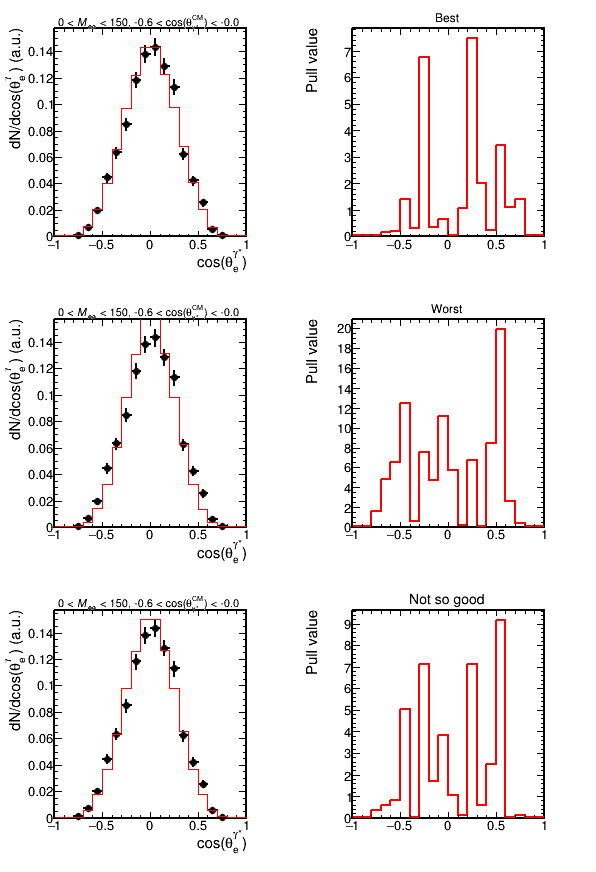

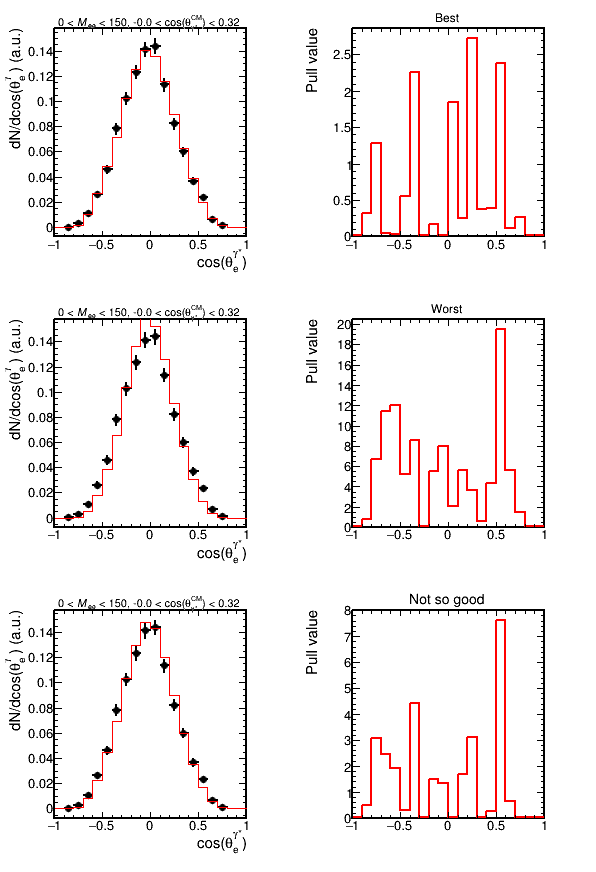

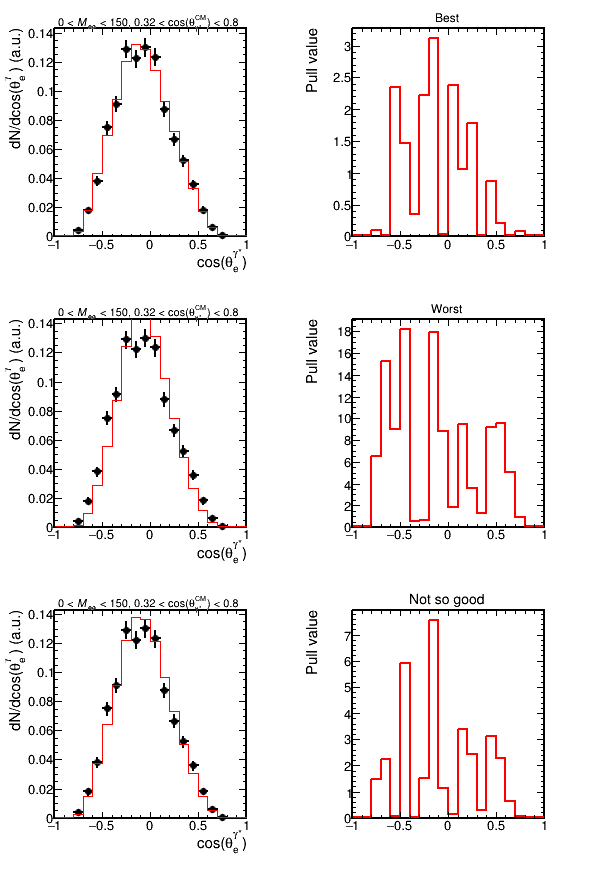

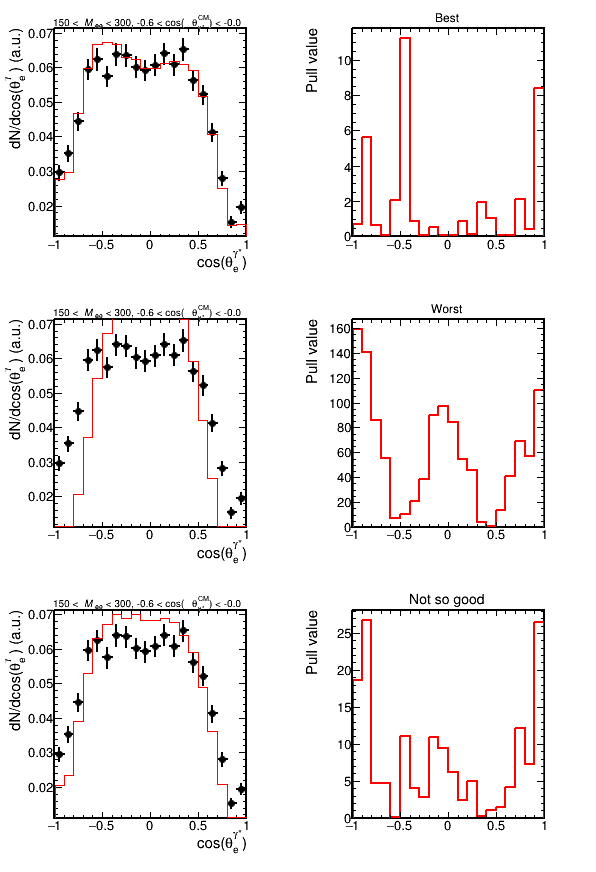

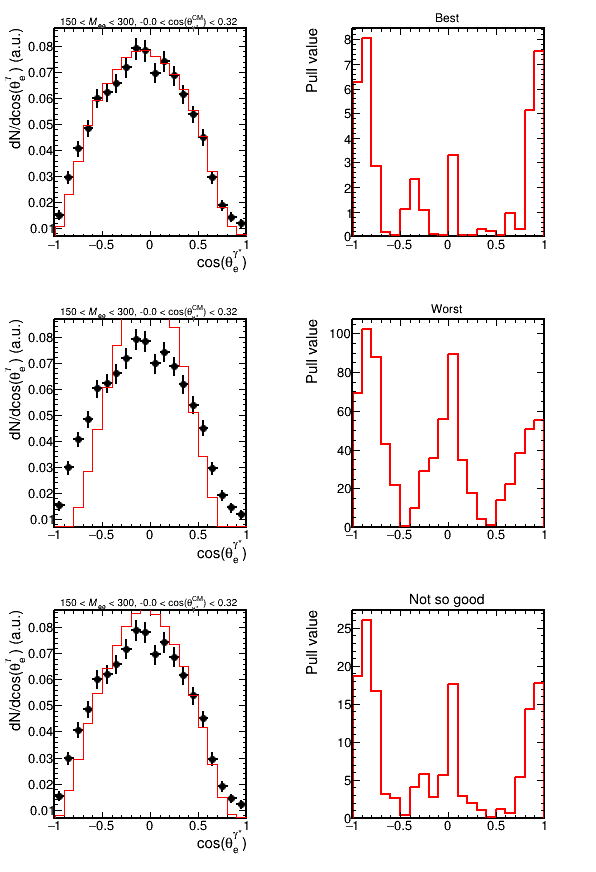

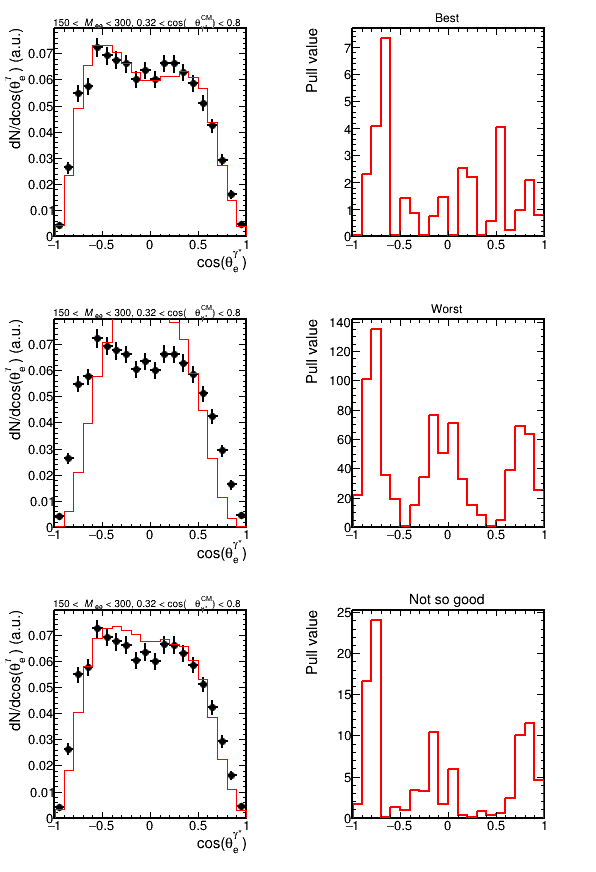

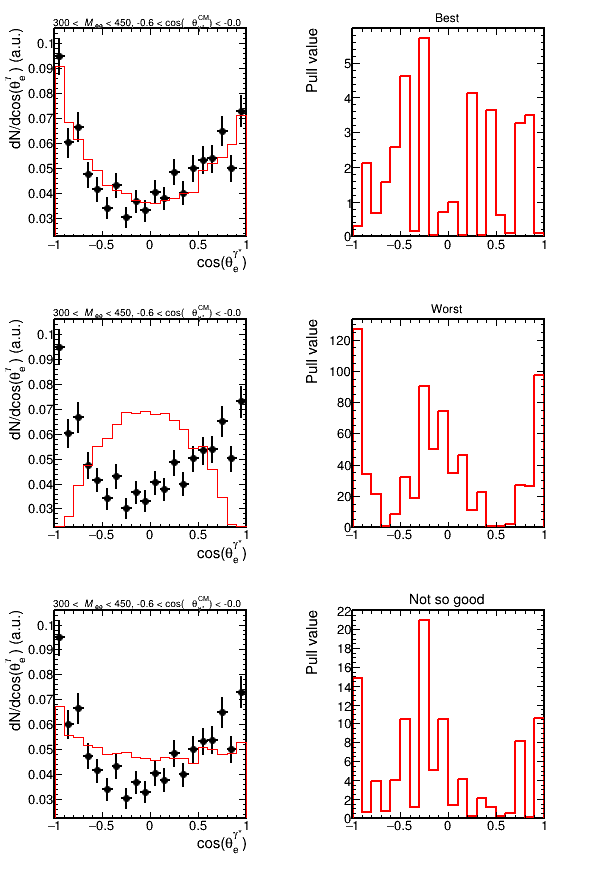

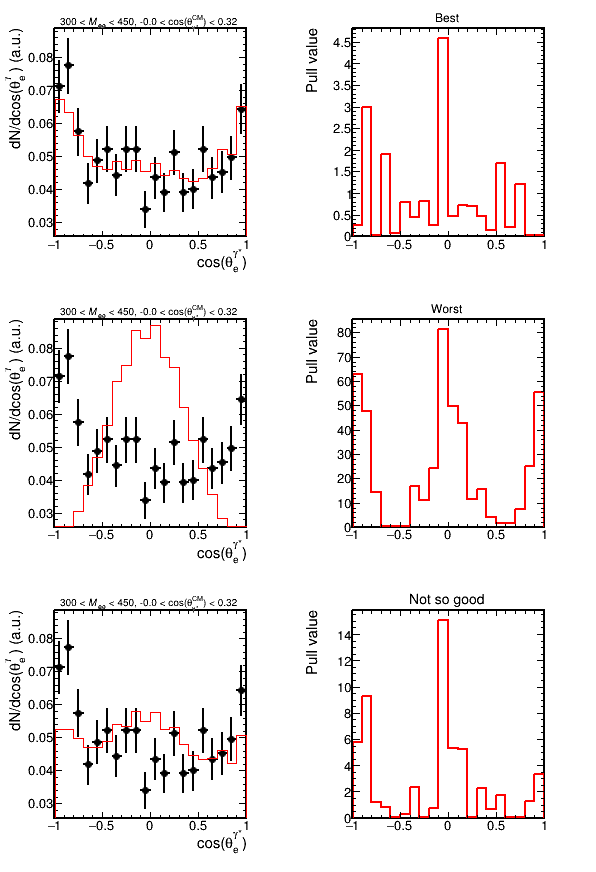

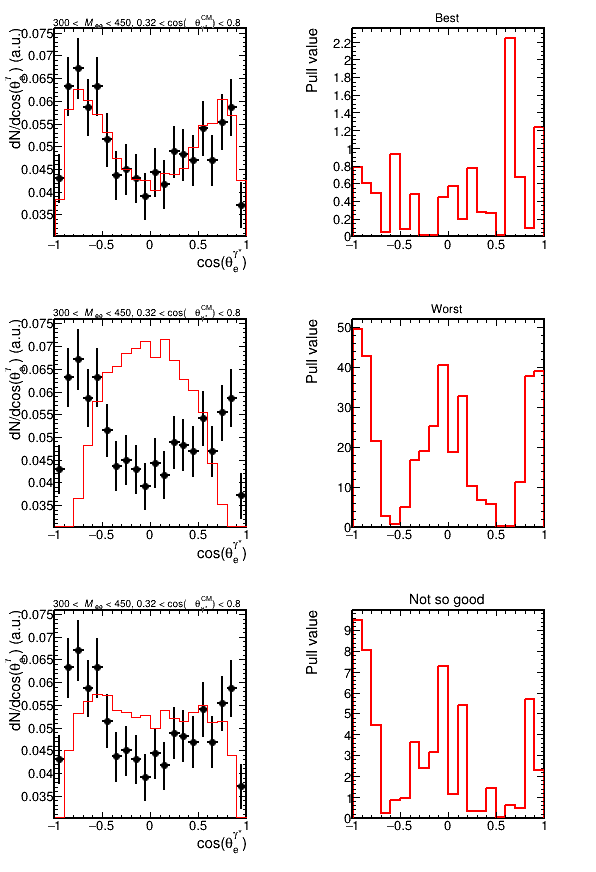

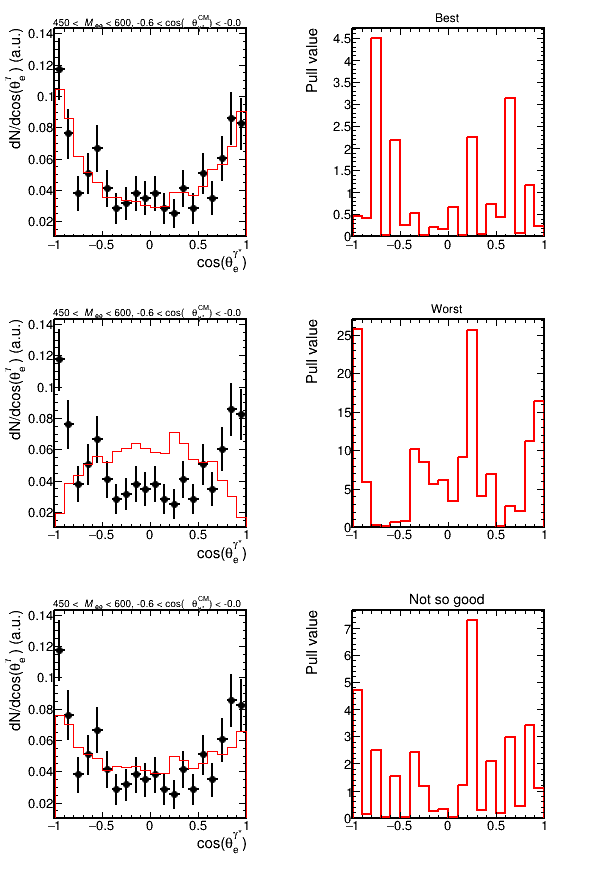

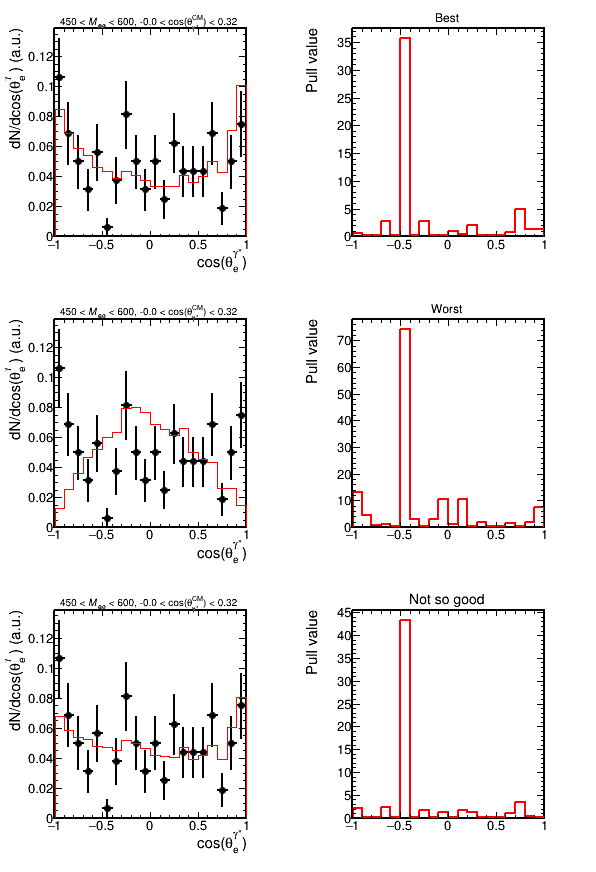

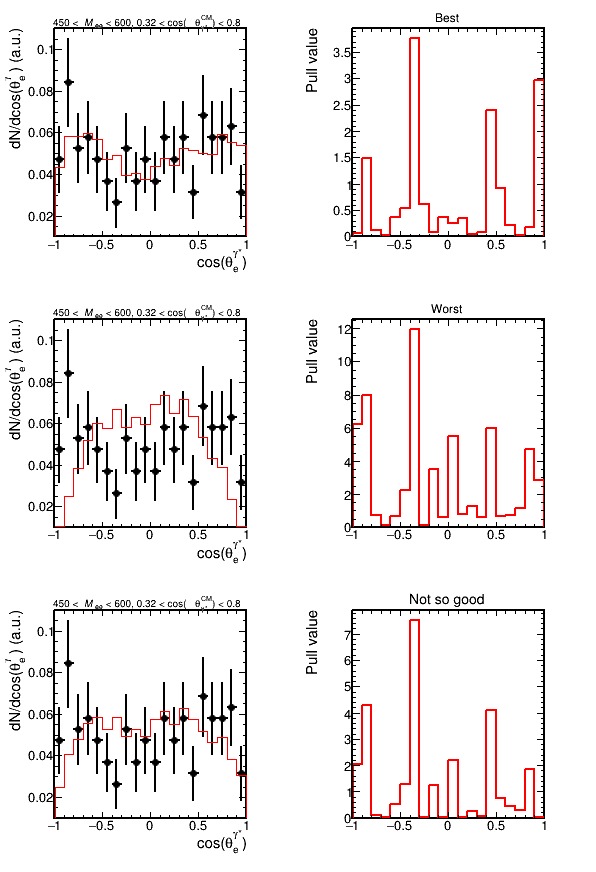

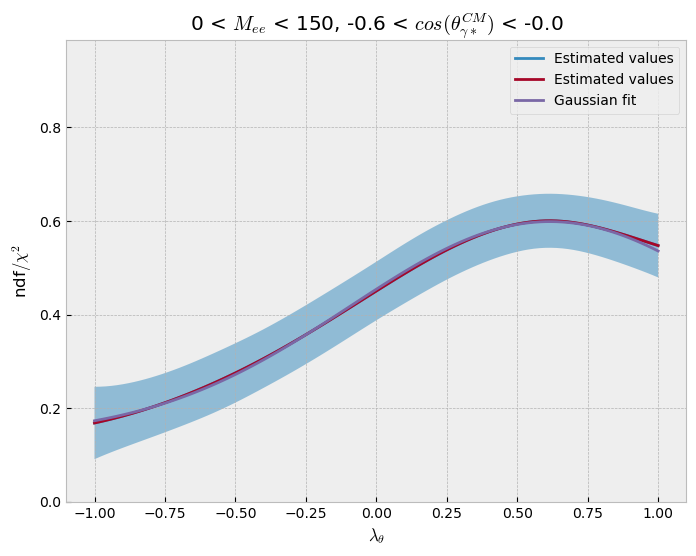

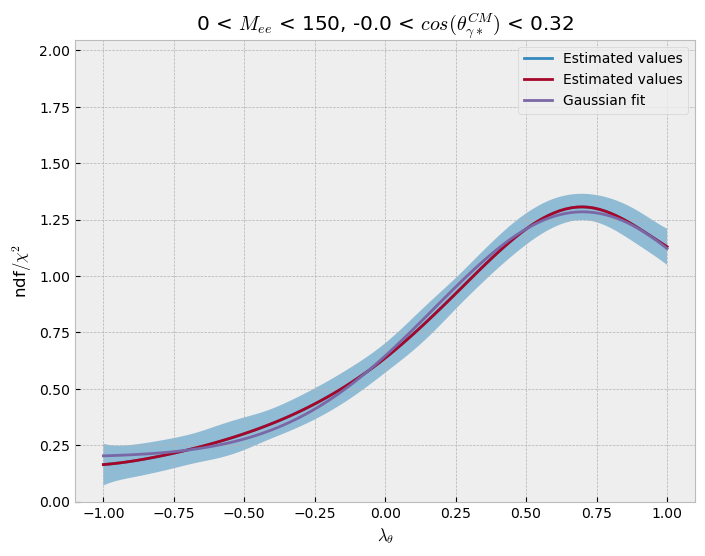

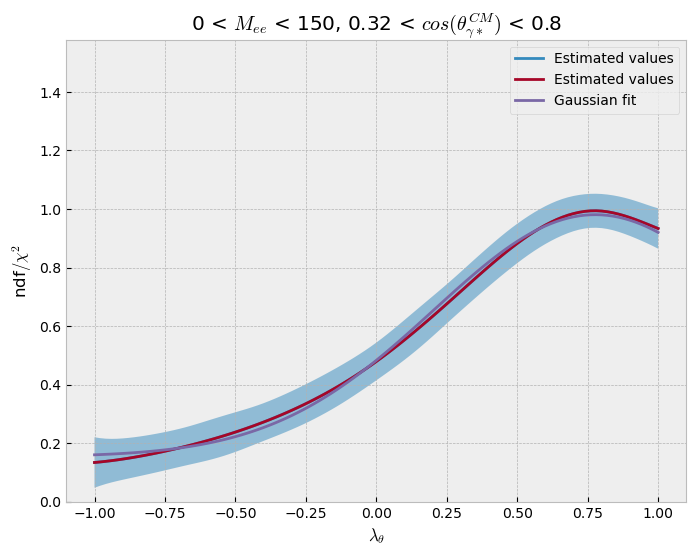

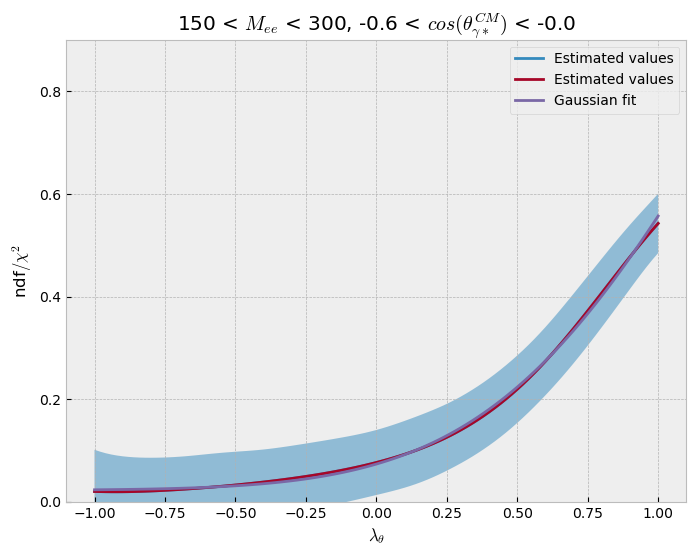

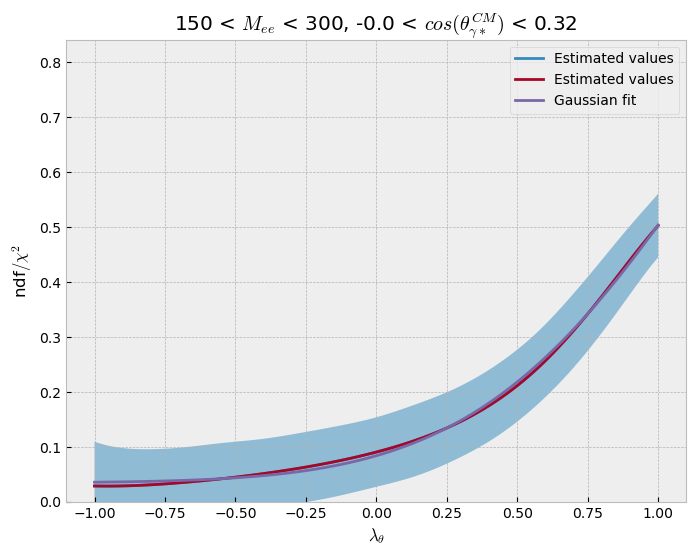

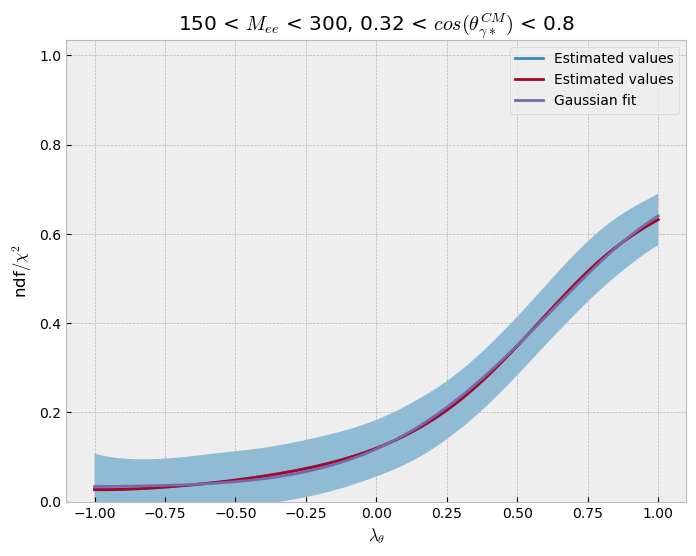

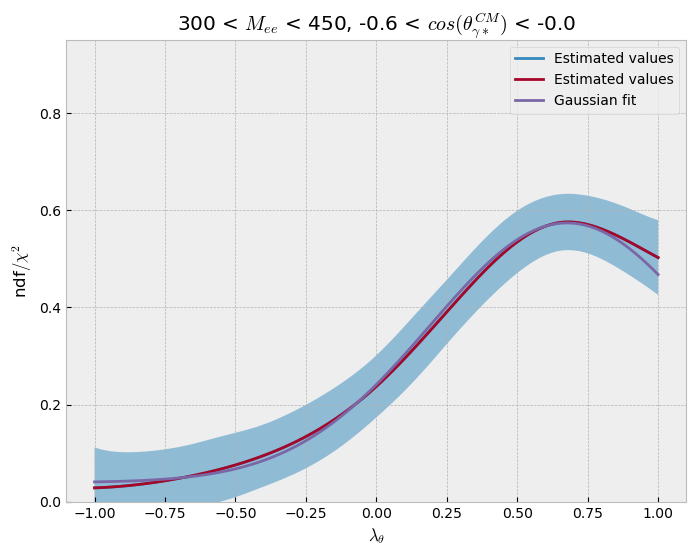

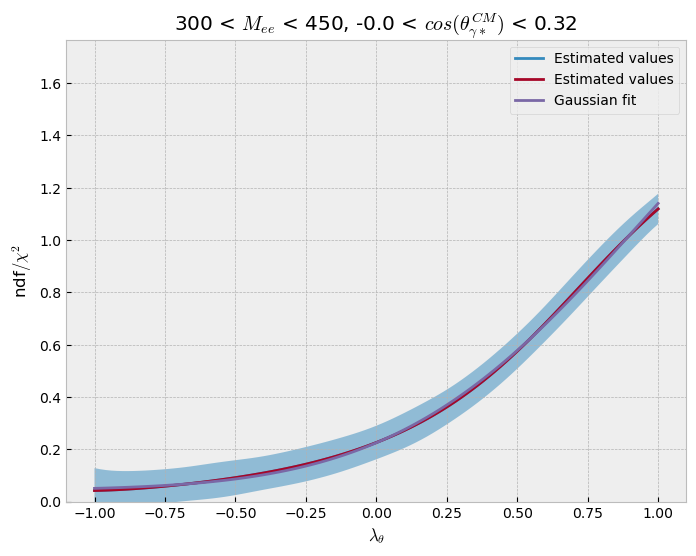

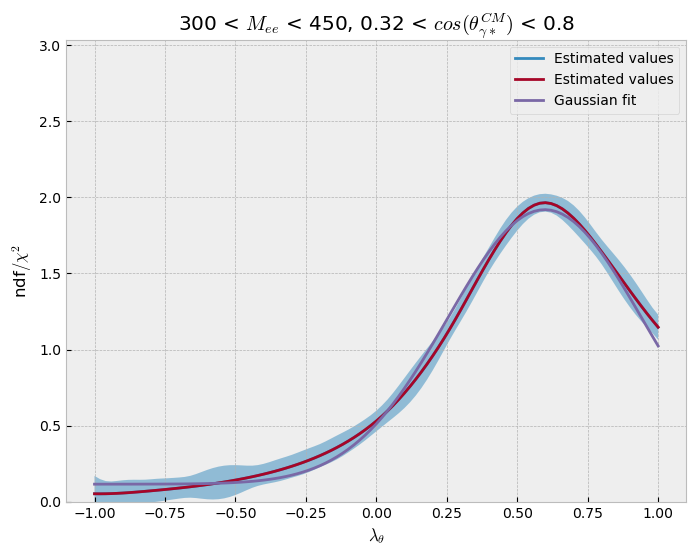

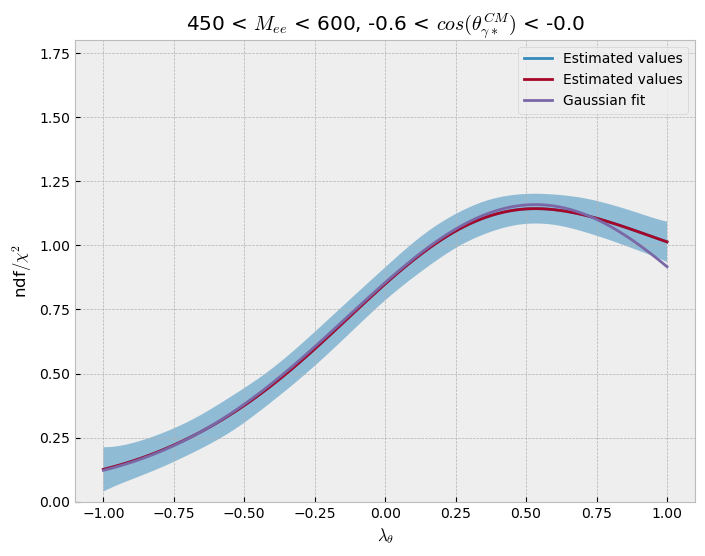

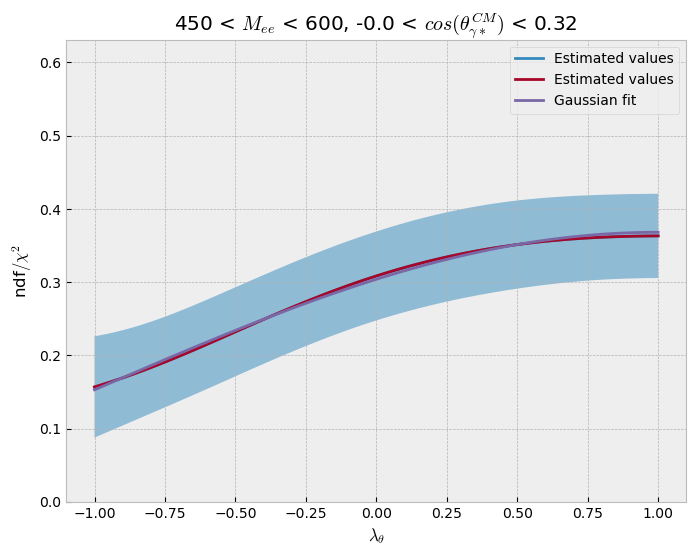

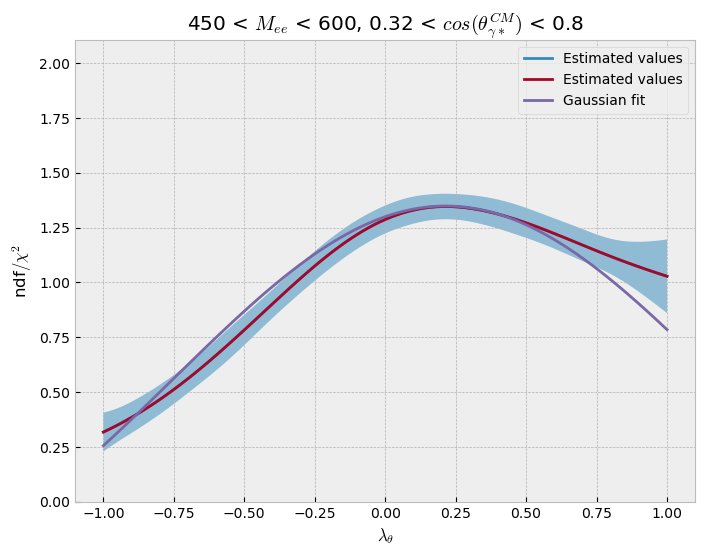

In [16]:

with open(f'{DIR_NAME}/results.txt', 'w') as fout:
    canvases = []
    hdiffs = []
    hmodels = []
    
    for HIST_INDEX in range_used:

        c_sorted = c_sorted_all[HIST_INDEX - range_used.start]
        train_x_sorted = train_x_sorted_all[HIST_INDEX - range_used.start]
        predictive_mean = predictive_mean_all[HIST_INDEX - range_used.start]
        predictive_lower = predictive_lower_all[HIST_INDEX - range_used.start]
        predictive_upper = predictive_upper_all[HIST_INDEX - range_used.start]
        predictive_mean_2 = predictive_mean - predictive_mean.min()

       # ax = plt.axes()
        fig, ax = plt.subplots(nrows=1, ncols=1)
        lambda_theta = train_x_sorted[-1]
        bestHistsMC = getHistMakerMC(HIST_INDEX).makeHists(lambda_theta)
        hmodels.append(bestHistsMC[0][HIST_INDEX])
        
        can1 = TCanvas(f"can_cmp_{HIST_INDEX}","can",600,900)
        can1.Divide(2,3)
        can1.Draw()        
        canvases.append(can1)
        
        hdiff1 = plotComparison(can1, 1, 2, bestHistsMC[0][HIST_INDEX], histsData_np[0][HIST_INDEX], HIST_INDEX, "Best")
        hdiffs.append(hdiff1)
        
        lambda_theta = train_x_sorted[0]
        worstHistsMC = getHistMakerMC(HIST_INDEX).makeHists(lambda_theta)
        hmodels.append(worstHistsMC[0][HIST_INDEX])
        hdiff2 = plotComparison(can1, 3, 4, worstHistsMC[0][HIST_INDEX], histsData_np[0][HIST_INDEX], HIST_INDEX, "Worst")
        hdiffs.append(hdiff2)

        shift = 0.75
        if train_x_sorted[-1] > shift - 1:
            diffToBest = torch.tensor([-shift])
        else:
            diffToBest = torch.tensor([+shift])
        lambda_theta = train_x_sorted[-1] + diffToBest
        notSoGoodHistsMC = getHistMakerMC(HIST_INDEX).makeHists(lambda_theta)
        hmodels.append(notSoGoodHistsMC[0][HIST_INDEX])
        hdiff22 = plotComparison(can1, 5, 6, notSoGoodHistsMC[0][HIST_INDEX], histsData_np[0][HIST_INDEX], HIST_INDEX, "Not so good")
        hdiffs.append(hdiff22)

        can1.SaveAs(f"{DIR_NAME}/comparison_{HIST_INDEX}.gif")

        print(str(HIST_INDEX) + ": Final result:")
        print(str(HIST_INDEX) + ": Final result:", file=fout)
        print(str(HIST_INDEX) + ": lambda_theta = ", c_sorted[-1][1].item())
        print(str(HIST_INDEX) + ": lambda_theta = ", c_sorted[-1][1].item(), file=fout)

        drphiz = covariance_fit_scipy(predictive_mean,predictive_lower,predictive_upper,train_x_sorted[-1],HIST_INDEX,ax)

        try:
            print(str(HIST_INDEX) + ": errors = ", drphiz)
            print(str(HIST_INDEX) + ": errors = ", drphiz, file=fout)
        except:
            print(str(HIST_INDEX) + ": errors could not be determined")
            print(str(HIST_INDEX) + ": errors could not be determined", file=fout)

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_0.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_1.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_2.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_3.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_4.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_5.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_6.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_7.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_8.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comp

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_0.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_1.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_2.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_3.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_4.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_5.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_6.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_7.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comparison_8.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d/comp

#2 [[<cppyy.gbl.TH1F object at 0x2d771b0d0>, <cppyy.gbl.TH1F object at 0x2d775bd00>, <cppyy.gbl.TH1F object at 0x2d775c0f0>, <cppyy.gbl.TH1F object at 0x2d775e120>, <cppyy.gbl.TH1F object at 0x2d775e510>, <cppyy.gbl.TH1F object at 0x2d775e900>, <cppyy.gbl.TH1F object at 0x2d775ecf0>, <cppyy.gbl.TH1F object at 0x2d775f0e0>, <cppyy.gbl.TH1F object at 0x2d775f4d0>, <cppyy.gbl.TH1F object at 0x2d775f8c0>, <cppyy.gbl.TH1F object at 0x2d775fcb0>, <cppyy.gbl.TH1F object at 0x2d77600a0>], [<cppyy.gbl.TH1F object at 0x17e7995d0>, <cppyy.gbl.TH1F object at 0x17e79a030>], [<cppyy.gbl.TH1F object at 0x17e7999c0>, <cppyy.gbl.TH1F object at 0x17e79a420>]]
#2 [[<cppyy.gbl.TH1F object at 0x2cf06b050>, <cppyy.gbl.TH1F object at 0x2cf06bfc0>, <cppyy.gbl.TH1F object at 0x2cf06c3b0>, <cppyy.gbl.TH1F object at 0x2cf06c7a0>, <cppyy.gbl.TH1F object at 0x2cf06cb90>, <cppyy.gbl.TH1F object at 0x2cf06cf80>, <cppyy.gbl.TH1F object at 0x2cf06d370>, <cppyy.gbl.TH1F object at 0x2cf06d760>, <cppyy.gbl.TH1F object at

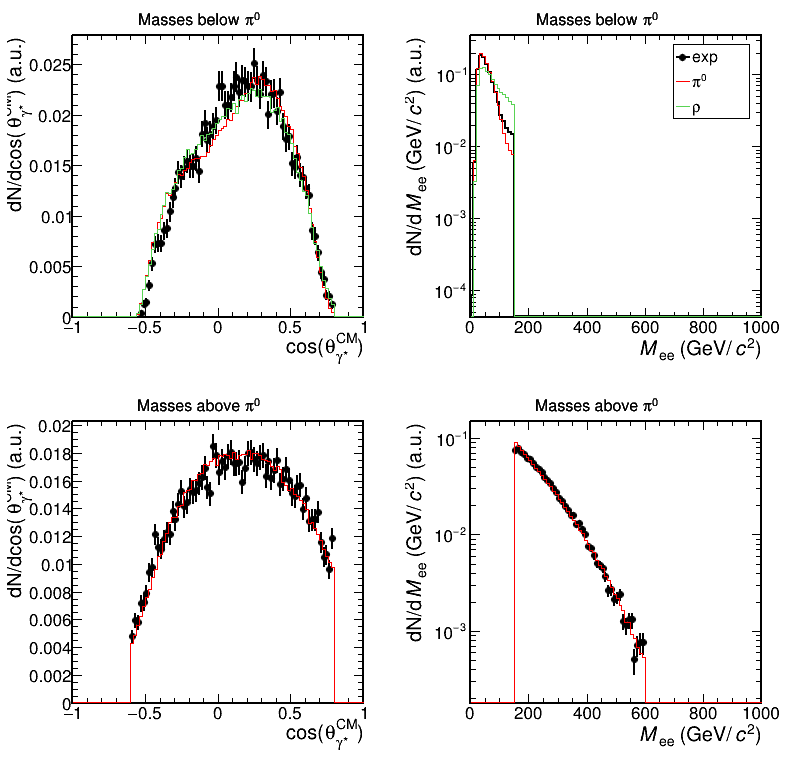

In [17]:
hmodelLowM_rho = histMakerMC_rho.makeHists((1.0))
hmodelLowM_rho[2][0].SetLineColor(8)
hmodelLowM_rho[1][0].SetLineColor(8)

hmodelLowM = histMakerMC_pi0.makeHists((1.0))

fraction = 0.25

hmodelLowM[2][0].Scale(1.0/hmodelLowM[2][0].Integral())
hmodelLowM[1][0].Scale(1.0/hmodelLowM[1][0].Integral())
hmodelLowM_rho[2][0].Scale(1.0/hmodelLowM_rho[2][0].Integral())
hmodelLowM_rho[1][0].Scale(1.0/hmodelLowM_rho[1][0].Integral())

hmodelLowM[2][0].Add(hmodelLowM_rho[2][0], fraction)
hmodelLowM[1][0].Add(hmodelLowM_rho[1][0], fraction)

hmodelLowM[2][0].SetLineColor(2)
hmodelLowM[1][0].SetLineColor(2)
hmodelHigM = getHistMakerMC(3).makeHists(1.0)
hmodelHigM[2][1].SetLineColor(2)
hmodelHigM[1][1].SetLineColor(2)

cc = TCanvas("cc","cc",800,800)
cc.Divide(2,2)
cc.Draw()

pad = cc.cd(1)
setPad(pad)
dataScale = 1./histsData_np[2][0].Integral()
histsData_np[2][0].Scale(dataScale)
histsData_pp[2][0].Scale(dataScale)
histsData_nn[2][0].Scale(dataScale)
hmodelLowM[2][0].Scale(1./hmodelLowM[2][0].Integral())
hmodelLowM_rho[2][0].Scale(1./hmodelLowM_rho[2][0].Integral())
histsData_np[2][0].GetXaxis().SetTitle("cos(#theta^{CM}_{#gamma*})")
histsData_np[2][0].SetTitle("Masses below #pi^{0}")

setTH1(histsData_np[2][0], histsData_np[2][0].GetXaxis().GetTitle(), 
       f"dN/d{histsData_np[2][0].GetXaxis().GetTitle()} (a.u.)", 505, 20, 0.8, 1)
histsData_np[2][0].Draw()
#histsData_pp[2][0].Draw("SAME")
#histsData_nn[2][0].Draw("SAME")
hmodelLowM[2][0].Draw("SAMEHIST")
hmodelLowM_rho[2][0].Draw("SAMEHIST")

pad = cc.cd(2)
pad.SetLogy()
setPad(pad)
histsData_np[1][0].Scale(1./histsData_np[1][0].Integral())
hmodelLowM[1][0].Scale(1./hmodelLowM[1][0].Integral())
hmodelLowM_rho[1][0].Scale(1./hmodelLowM_rho[1][0].Integral())
histsData_np[1][0].SetTitle("Masses below #pi^{0}")
histsData_np[1][0].GetXaxis().SetTitle("#it{M}_{ee} (GeV/#it{c}^{2})")

setTH1(histsData_np[1][0], histsData_np[1][0].GetXaxis().GetTitle(), 
       f"dN/d{histsData_np[1][0].GetXaxis().GetTitle()} (a.u.)", 505, 20, 0.8, 1)
histsData_np[1][0].Draw("HIST")
hmodelLowM[1][0].Draw("SAMEHIST")
hmodelLowM_rho[1][0].Draw("SAMEHIST")

legend = TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(histsData_np[1][0], "exp", "pl")
legend.AddEntry(hmodelLowM[1][0], "#pi^{0}", "l")
legend.AddEntry(hmodelLowM_rho[1][0], "#rho", "l")
legend.Draw()

pad = cc.cd(3)
setPad(pad)
histsData_np[2][1].Scale(1./histsData_np[2][1].Integral())
hmodelHigM[2][1].Scale(1./hmodelHigM[2][1].Integral())
hmodelLowM_rho[2][1].Scale(1./hmodelLowM_rho[2][1].Integral())
histsData_np[2][1].GetXaxis().SetTitle("cos(#theta^{CM}_{#gamma*})")
histsData_np[2][1].SetTitle("Masses above #pi^{0}")

setTH1(histsData_np[2][1], histsData_np[2][1].GetXaxis().GetTitle(), 
       f"dN/d{histsData_np[2][1].GetXaxis().GetTitle()} (a.u.)", 505, 20, 0.8, 1)
histsData_np[2][1].Draw()
hmodelHigM[2][1].Draw("SAMEHIST")
hmodelLowM_rho[2][1].Draw("SAMEHIST")

pad = cc.cd(4)
pad.SetLogy()
setPad(pad)
histsData_np[1][1].Scale(1./histsData_np[1][1].Integral())
hmodelHigM[1][1].Scale(1./hmodelHigM[1][1].Integral())
hmodelLowM_rho[1][1].Scale(1./hmodelLowM_rho[1][1].Integral())
histsData_np[1][1].GetXaxis().SetTitle("#it{M}_{ee} (GeV/#it{c}^{2})")
histsData_np[1][1].SetTitle("Masses above #pi^{0}")

setTH1(histsData_np[1][1], histsData_np[1][1].GetXaxis().GetTitle(), 
       f"dN/d{histsData_np[1][1].GetXaxis().GetTitle()} (a.u.)", 505, 20, 0.8, 1)
histsData_np[1][1].Draw()
hmodelHigM[1][1].Draw("SAMEHIST")
hmodelLowM_rho[1][1].Draw("SAMEHIST")


#2 [[<cppyy.gbl.TH1F object at 0x2d8146340>, <cppyy.gbl.TH1F object at 0x2d8148020>, <cppyy.gbl.TH1F object at 0x2d816fcb0>, <cppyy.gbl.TH1F object at 0x2d817a430>, <cppyy.gbl.TH1F object at 0x2d817a820>, <cppyy.gbl.TH1F object at 0x2d817ac10>, <cppyy.gbl.TH1F object at 0x2d817b000>, <cppyy.gbl.TH1F object at 0x2d817be60>, <cppyy.gbl.TH1F object at 0x2d817c250>, <cppyy.gbl.TH1F object at 0x2d817c640>, <cppyy.gbl.TH1F object at 0x2d817ca30>, <cppyy.gbl.TH1F object at 0x2d817ce20>], [<cppyy.gbl.TH1F object at 0x17e7995d0>, <cppyy.gbl.TH1F object at 0x17e79a030>], [<cppyy.gbl.TH1F object at 0x17e7999c0>, <cppyy.gbl.TH1F object at 0x17e79a420>]]
#2 [[<cppyy.gbl.TH1F object at 0x2d77620e0>, <cppyy.gbl.TH1F object at 0x2d7762d00>, <cppyy.gbl.TH1F object at 0x2d77630f0>, <cppyy.gbl.TH1F object at 0x2d77634e0>, <cppyy.gbl.TH1F object at 0x2d77638d0>, <cppyy.gbl.TH1F object at 0x2d7763cc0>, <cppyy.gbl.TH1F object at 0x2d77640b0>, <cppyy.gbl.TH1F object at 0x2d77644a0>, <cppyy.gbl.TH1F object at

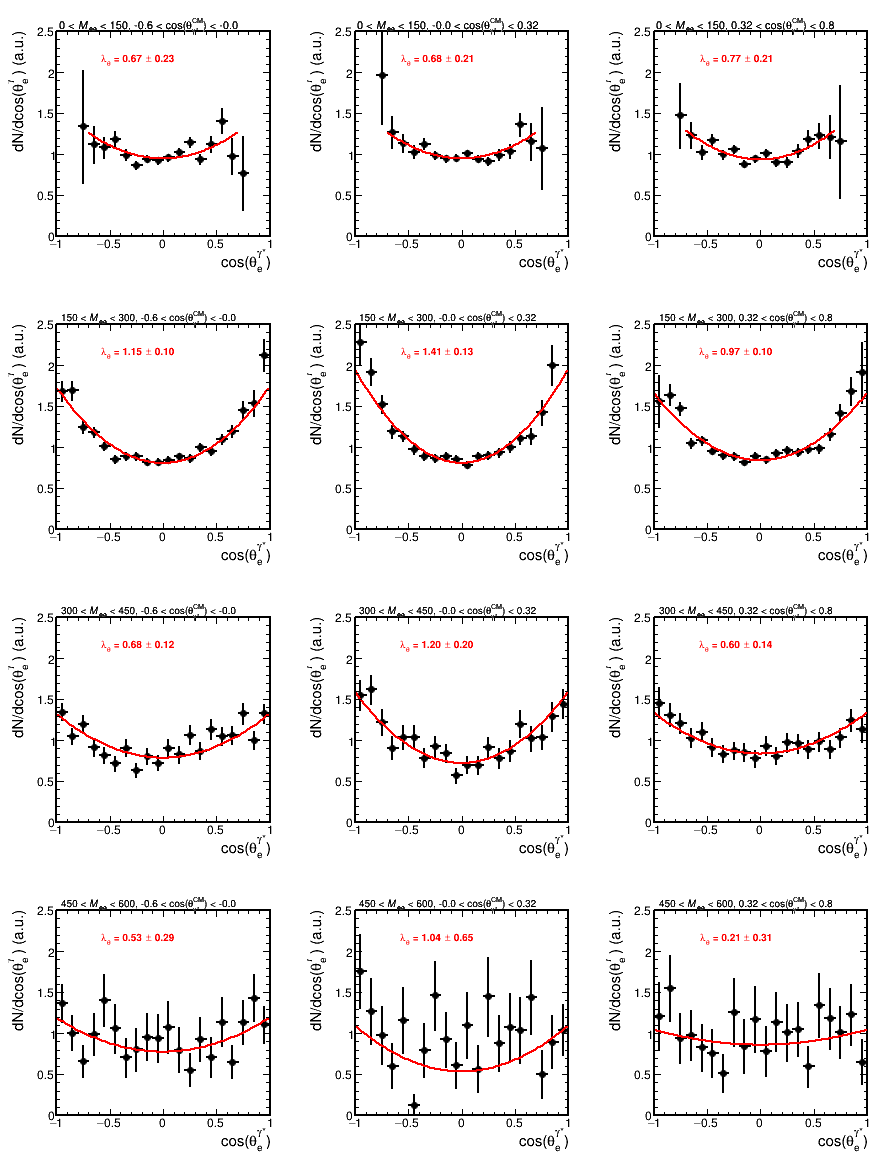

In [18]:
histsDataCorrs = []
hmodelLowM_null = histMakerMC_rho.makeHists((0.0))
hmodelLowM_null_pi0 = histMakerMC_pi0.makeHists((0.0))
pol2s = []
paveTexts = []

cc4 = TCanvas("cc4","cc4",900,1200)
cc4.Divide(3,4)
cc4.Draw()
for i, hist in enumerate(histsData_np[0]):

    pad = cc4.cd(i+1)
    setPad(pad)
    if not isinstance(hist, list):
        histCorr = hist.Clone(hist.GetName() + "_corr")
        histsDataCorrs.append(histCorr)
        histCorr.GetXaxis().SetTitle("cos(#theta_{e}^{#gamma*})")
        
        if i < 3:
            histCorr.Divide(hmodelLowM_null_pi0[0][i])
        else:
            histCorr.Divide(hmodelLowM_null[0][i])
       
       # print(f"{i} creating fit function")
        fit = TF1(f"fit_{i}", "[0]*(1+[1]*x*x)",-1,1)
        fit.SetParameters(1, 1)
        
        if i < 3:
            histCorr.Fit(fit,"Q","", -0.7, 0.7)
        else:
            histCorr.Fit(fit,"Q")
        pol2s.append(fit)
            
        setTH1(histCorr, histCorr.GetXaxis().GetTitle(), f"dN/d{histCorr.GetXaxis().GetTitle()} (a.u.)", 
               505, 20, 0.8, 1)
        histCorr.Draw()
        histCorr.GetYaxis().SetRangeUser(0,2.5)
        histCorr.SetMinimum(0)

        caption = f"#lambda_{{#theta}} = {fit.GetParameter(1):.2f} #pm {fit.GetParError(1):.2f}"
        paveText = setOPT_text(caption, 0.25,0.76,0.675,0.88, 2, 0.04)
        paveTexts.append(paveText)
        
    else:
        print(hist)